In [1]:
%load_ext autoreload
%autoreload 2
import tests
import utils
import matplotlib.pyplot as plt
import torch
import torch.utils.data as tdata
import numpy as np
import pandas as pd
import sys

In [4]:
df1 = pd.read_hdf("data/selfplay/random_gen0.h5", key="data")
df1.sample(10)

move  feature_0  feature_1  feature_2  \
generation game_idx move_idx                                          
0          1878     19           4          0          1          1   
           122      1           27          0          0          0   
           1098     7            8          1          0          0   
           1125     15          12          1          1          0   
           1946     13          14          1          1          0   
           990      12          23          1          1          0   
           1279     18          21          1          0          1   
           488      5           27          0          0          0   
           846      15          25          0          1          0   
           199      17          17          0          1          0   

                              feature_3  feature_4  feature_5  feature_6  \
generation game_idx move_idx                                               
0          1878     19                0          1          1          1   
           122      1                 0          0          0          0   
           1098     7                 0          0          1          1   
           1125     15                0          1          1          0   
           1946     13                0          0          0          1   
           990      12                0          1          0          1   
           1279     18                0          1          0          1   
           488      5                 0          0          0          0   
           846      15                0          1          0          0   
           199      17                0          0          1          1   

                              feature_7  feature_8       ...        policy_27  \
generation game_idx move_idx                             ...                    
0          1878     19                0          1       ...         0.000000   
           122      1                 0          0       ...         0.000000   
           1098     7                 0          1       ...         0.074306   
           1125     15                0          1       ...         0.000000   
           1946     13                0          1       ...         0.000000   
           990      12                0          0       ...         0.000000   
           1279     18                0          0       ...         0.000000   
           488      5                 0          0       ...         0.000000   
           846      15                0          1       ...         0.000000   
           199      17                0          0       ...         0.000000   

                              policy_28  policy_29  policy_30  policy_31  \
generation game_idx move_idx                                               
0          1878     19              0.0        0.0        0.0        0.0   
           122      1               0.0        0.0        0.0        0.0   
           1098     7               0.0        0.0        0.0        0.0   
           1125     15              0.0        0.0        0.0        0.0   
           1946     13              0.0        0.0        0.0        0.0   
           990      12              0.0        0.0        0.0        0.0   
           1279     18              0.0        0.0        0.0        0.0   
           488      5               0.0        0.0        0.0        0.0   
           846      15              0.0        0.0        0.0        0.0   
           199      17              0.0        0.0        0.0        0.0   

                              value  moves_nb  max_deepness  tree_size  \
generation game_idx move_idx                                             
0          1878     19           -1        20             5     2148.0   
           122      1            -1         2             4       36.0   
           1098     7             1         8             4      118.0   
        

In [11]:
gen0 = df1.reset_index().drop(columns=["generation"])
gen0.sample(5)
#gen0.to_hdf("data/simple_hdf.h5", "data/sp/gen0", format="t")

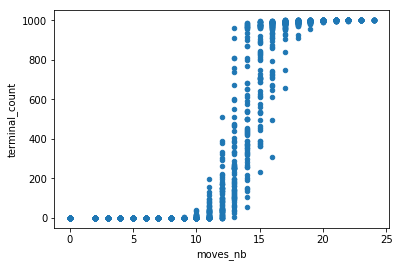

In [22]:
gen0 = pd.read_hdf("data/selfplay/test.h5", key="data")
#gen0 = gen0.reset_index().drop(columns=["generation"])
#gen0.sample(5)
#gen0.to_hdf("data/simple_hdf.h5", "data/sp/gen0", mode="w", format="t")

gen0.plot.scatter("moves_nb", "terminal_count")

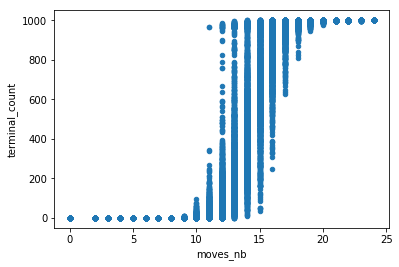

In [23]:
gen1 = pd.read_hdf("data/selfplay/test1.h5", key="data")
#gen1 = gen1.reset_index().drop(columns=["generation"])
#gen1.sample(5)
#gen1.to_hdf("data/simple_hdf.h5", "data/sp/gen1", mode="a", format="t")
gen1.plot.scatter("moves_nb", "terminal_count")

In [ ]:
tests.train_nn(generation=2, file="selfplay1.pkl", to_idx=1000, epochs=1000)

selfplay samples loaded from: selfplay1.pkl
Model loaded from: ./data/model_chkpts/simple_2.pt


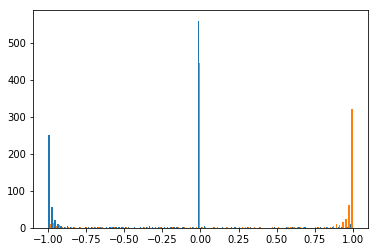

In [28]:
from dots_boxes.dots_boxes_nn import SimpleNN

generation = 2
show_values= False

ds = utils.PickleDataset("./data/selfplay/", file="selfplay{}.pkl".format(int(generation)-1), from_idx=0, to_idx=1000)
dl = tdata.DataLoader(ds, 10)

model = SimpleNN()
model.load_parameters(
    "./data/model_chkpts/simple_{}.pt".format(generation))

vs = []
zs = []
for batch in dl:
    zs.append(batch[2])
    p, v = model(batch[0])
    vs.append(v)
    
vs = torch.cat(vs).detach().numpy()
zs = torch.cat(zs).detach().numpy()
if show_values:
    print(vs.sum(), zs.sum())
    print(np.concatenate((vs, zs), axis=1))
v_m1 = np.zeros(len(vs))
v_p1 = np.zeros(len(vs))
for i, (v,z) in enumerate(zip(vs, zs)):
    if z<0:
        v_m1[i] = v
    else:
        v_p1[i] = v
    
_ = plt.hist([v_m1, v_p1], bins=100, label=["-1", "+1"])
    